In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score ,roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\91945\\Downloads\\ibm-hr-analytics-employee-attrition-performance\\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.info()#checking datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.isna().sum()#no null entries in columns

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Let's encode object datatype using Label Encoder

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Attrition']=le.fit_transform(df['Attrition'])
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])
df['Department']=le.fit_transform(df['Department'])
df['EducationField']=le.fit_transform(df['EducationField'])
df['Gender']=le.fit_transform(df['Gender'])
df['JobRole']=le.fit_transform(df['JobRole'])
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])
df['Over18']=le.fit_transform(df['Over18'])
df['OverTime']=le.fit_transform(df['OverTime'])
        

In [6]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Check for data distribution

In [7]:
#Employee count,Over18,StandardHours has same no throughout data
#Employee number is continuous
#let's drop them
df.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)

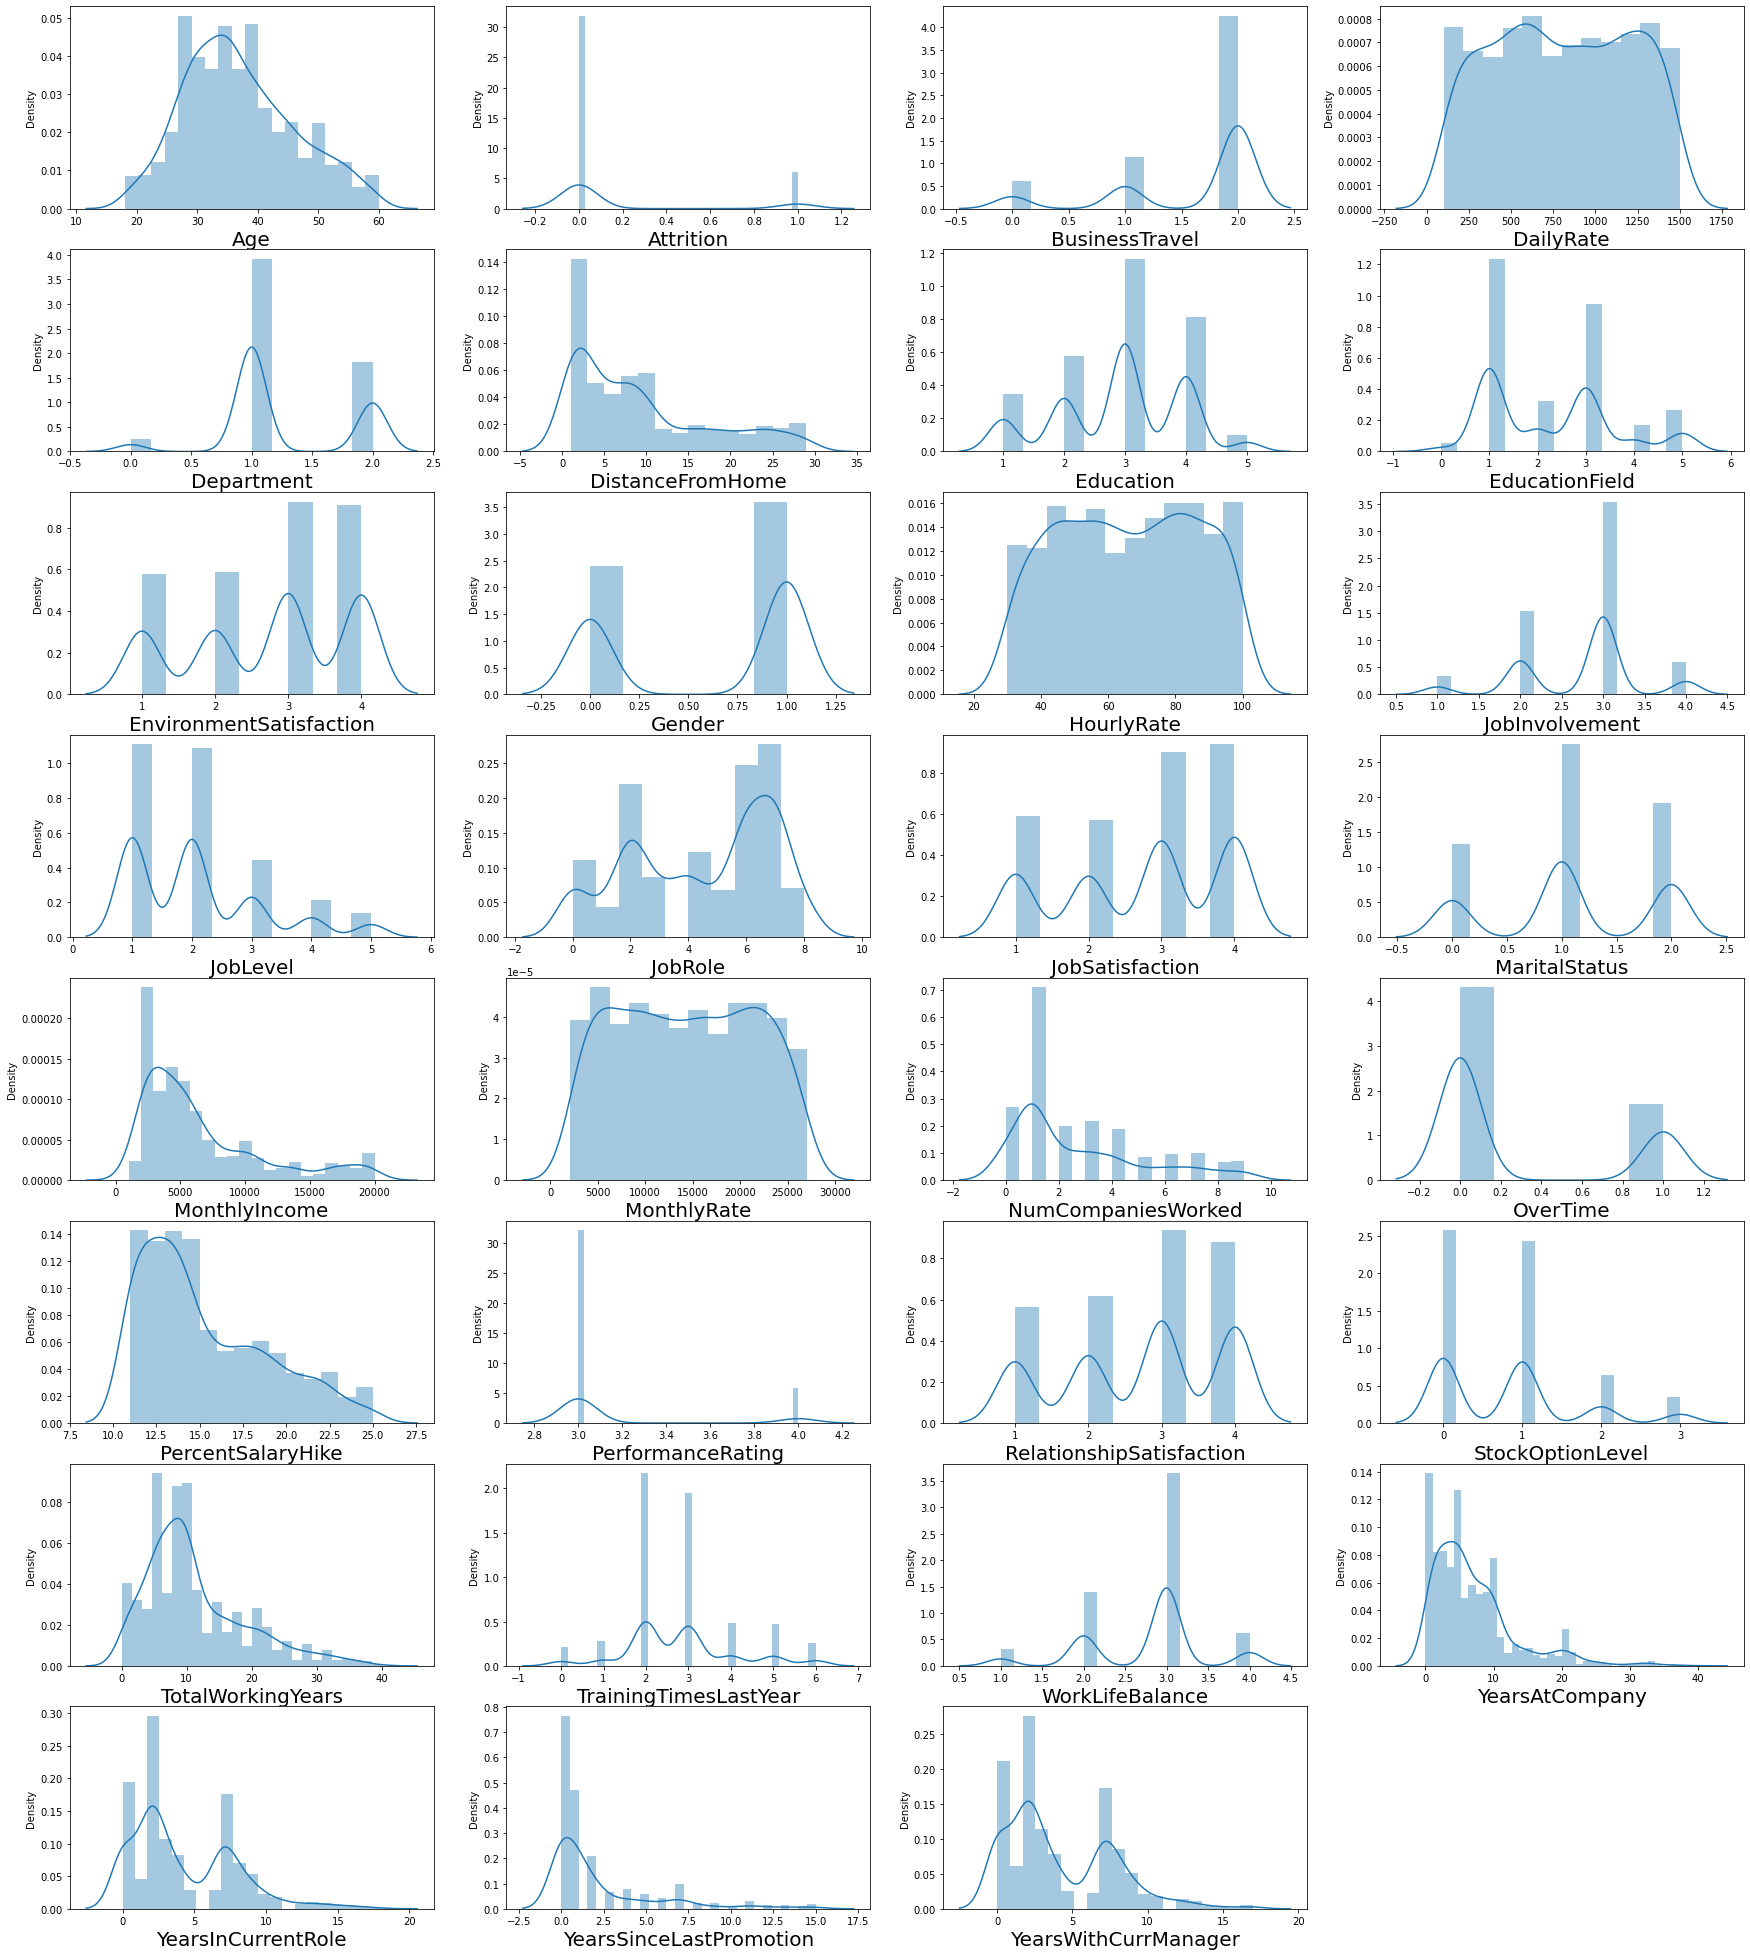

In [8]:
plt.figure(figsize=(30,35),facecolor='white')#checking data distribution wheather its normal (bell shape )
plotnumber=1
for column in df:
    if plotnumber<=31:
        ax=plt.subplot(8,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1  
plt.show()

Distance from home,Monthly income,PercentSalaryHike,TotalWorkingYears,YearsInCurrentRole,YearsSinceLastPromotion have skewness in data

remaining, all are categorical features.

### Let's check for multicollinearity

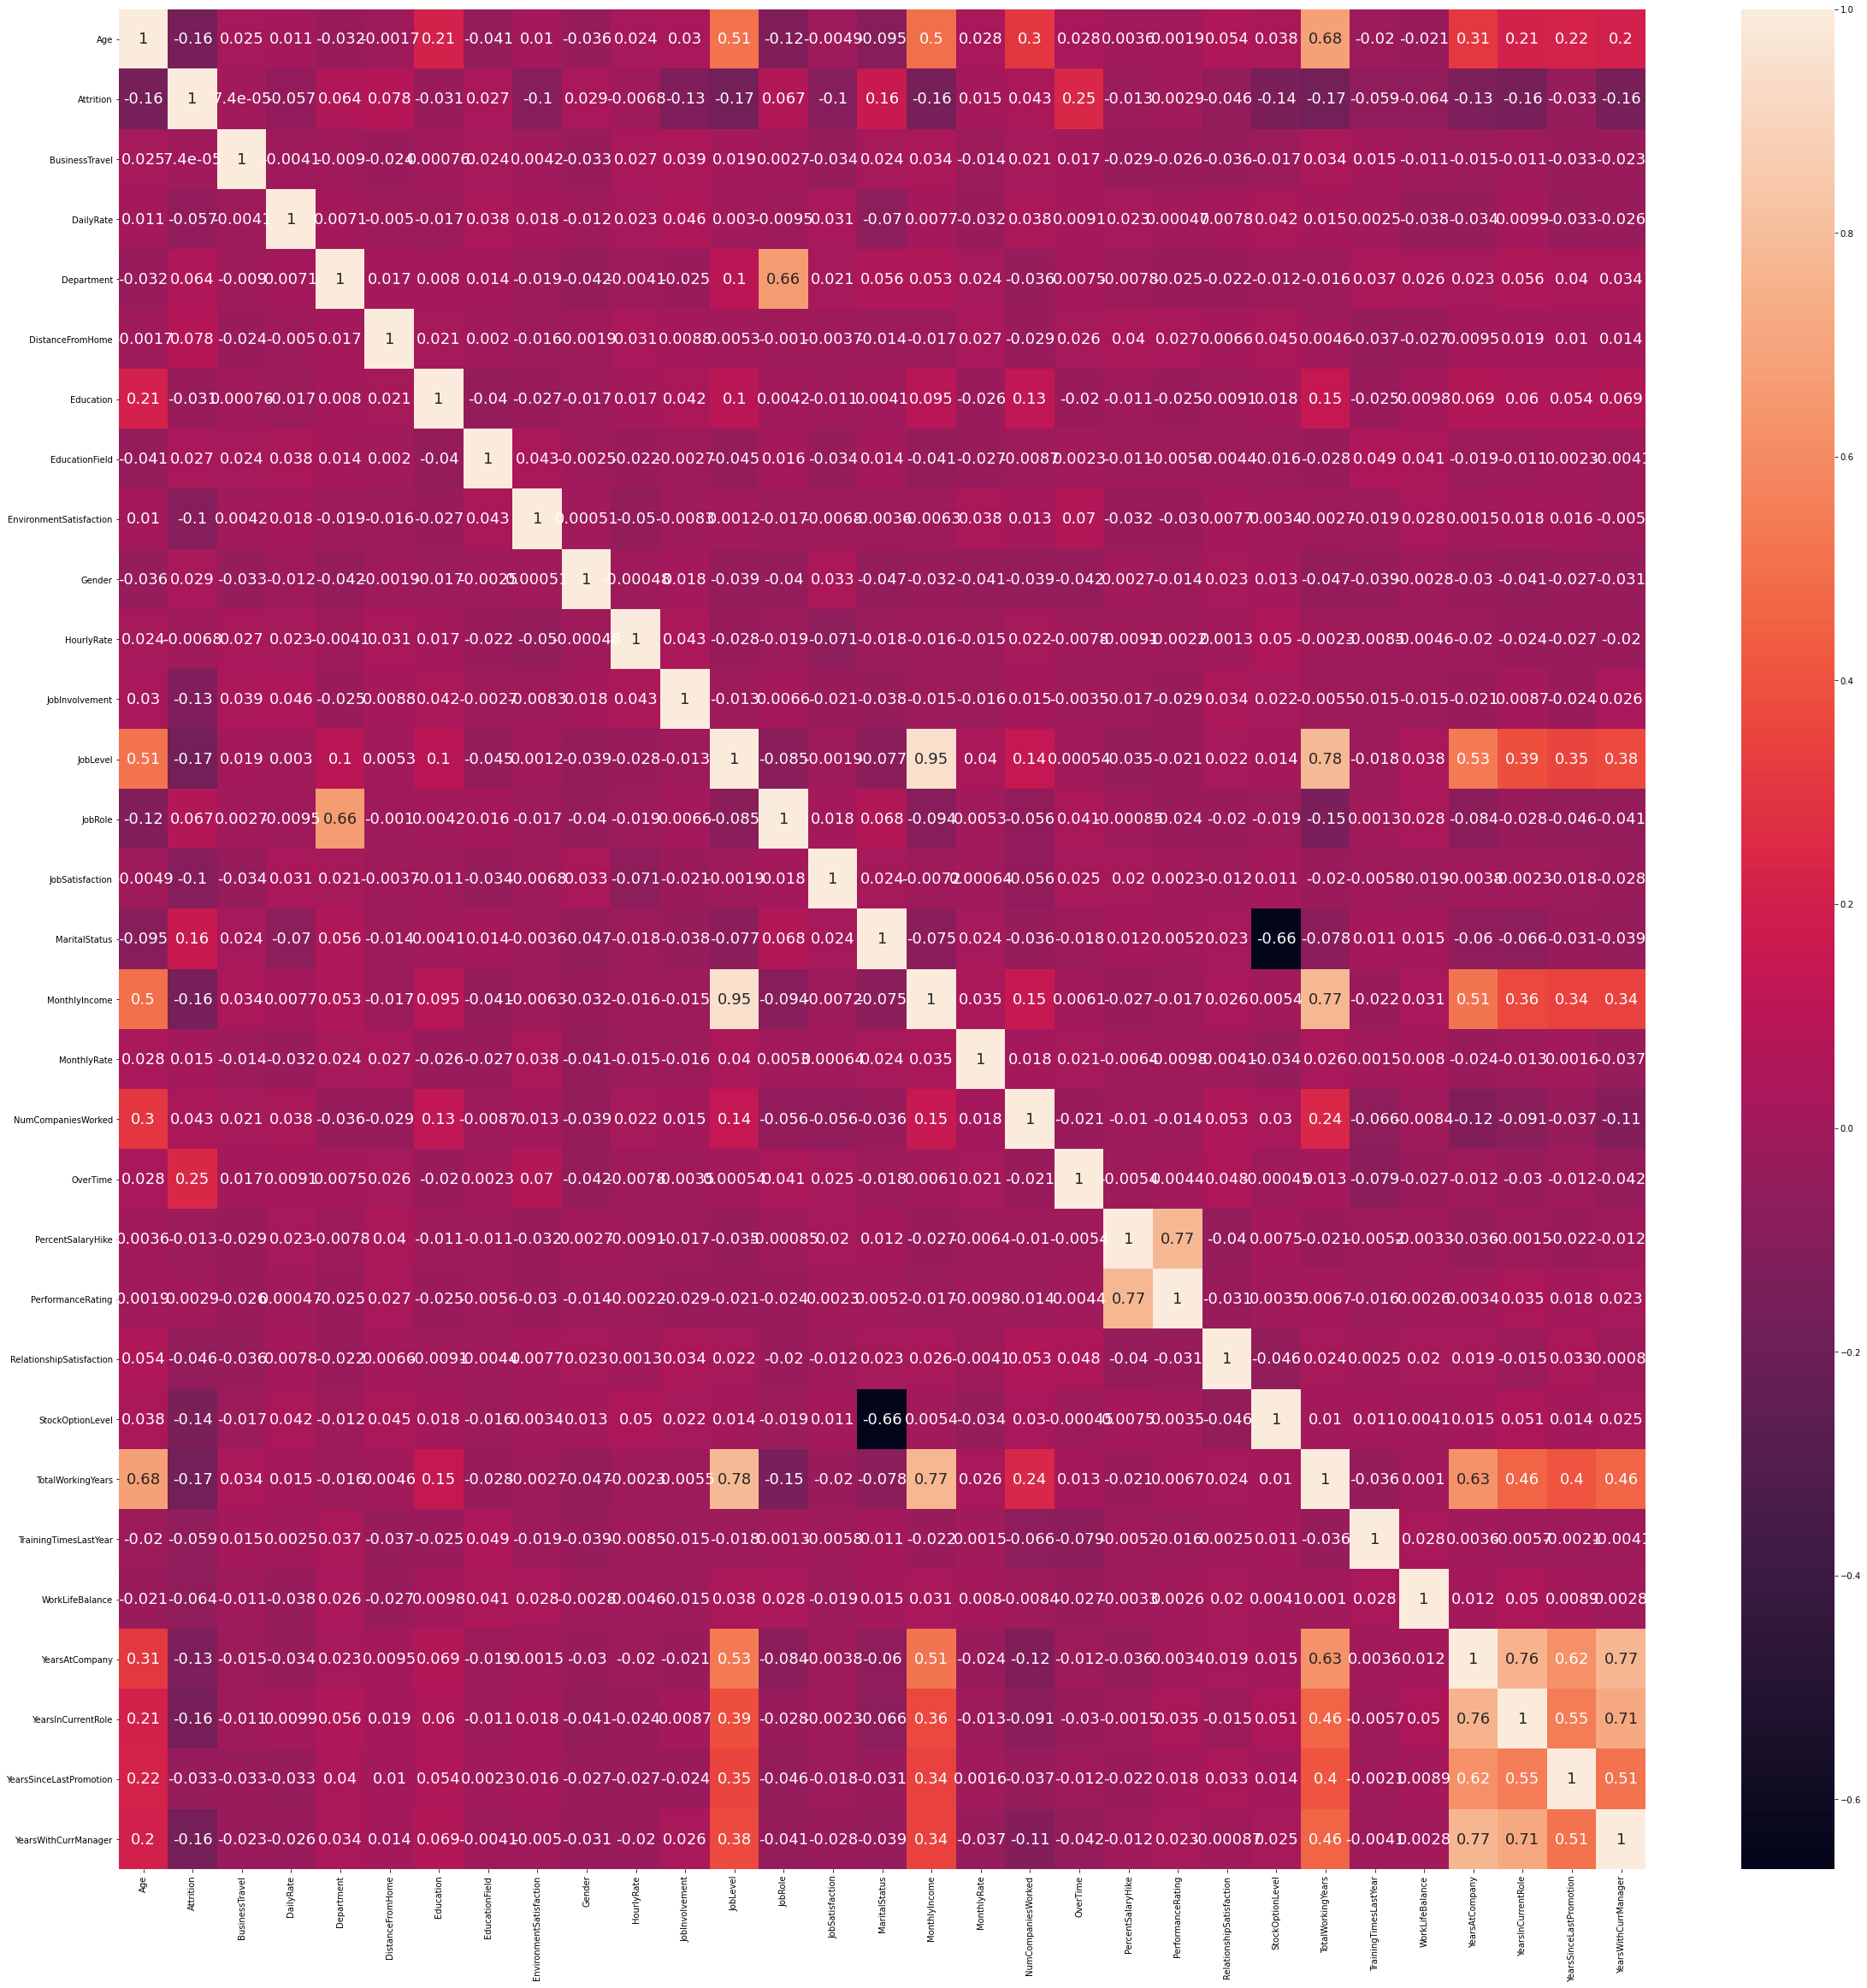

In [9]:
corr=df.corr()
plt.figure(figsize=(40,40))
sns.heatmap(data=corr,annot=True,annot_kws={'size':18})
plt.show()

years with current manager is positivly related with years at company,years with current role

years at company is positivly related with years with current role

there is no high multicollinearity between features.

there are various columns which has very low impact on target column,we will use select k best features for feature selection.


### Checking for Outliers

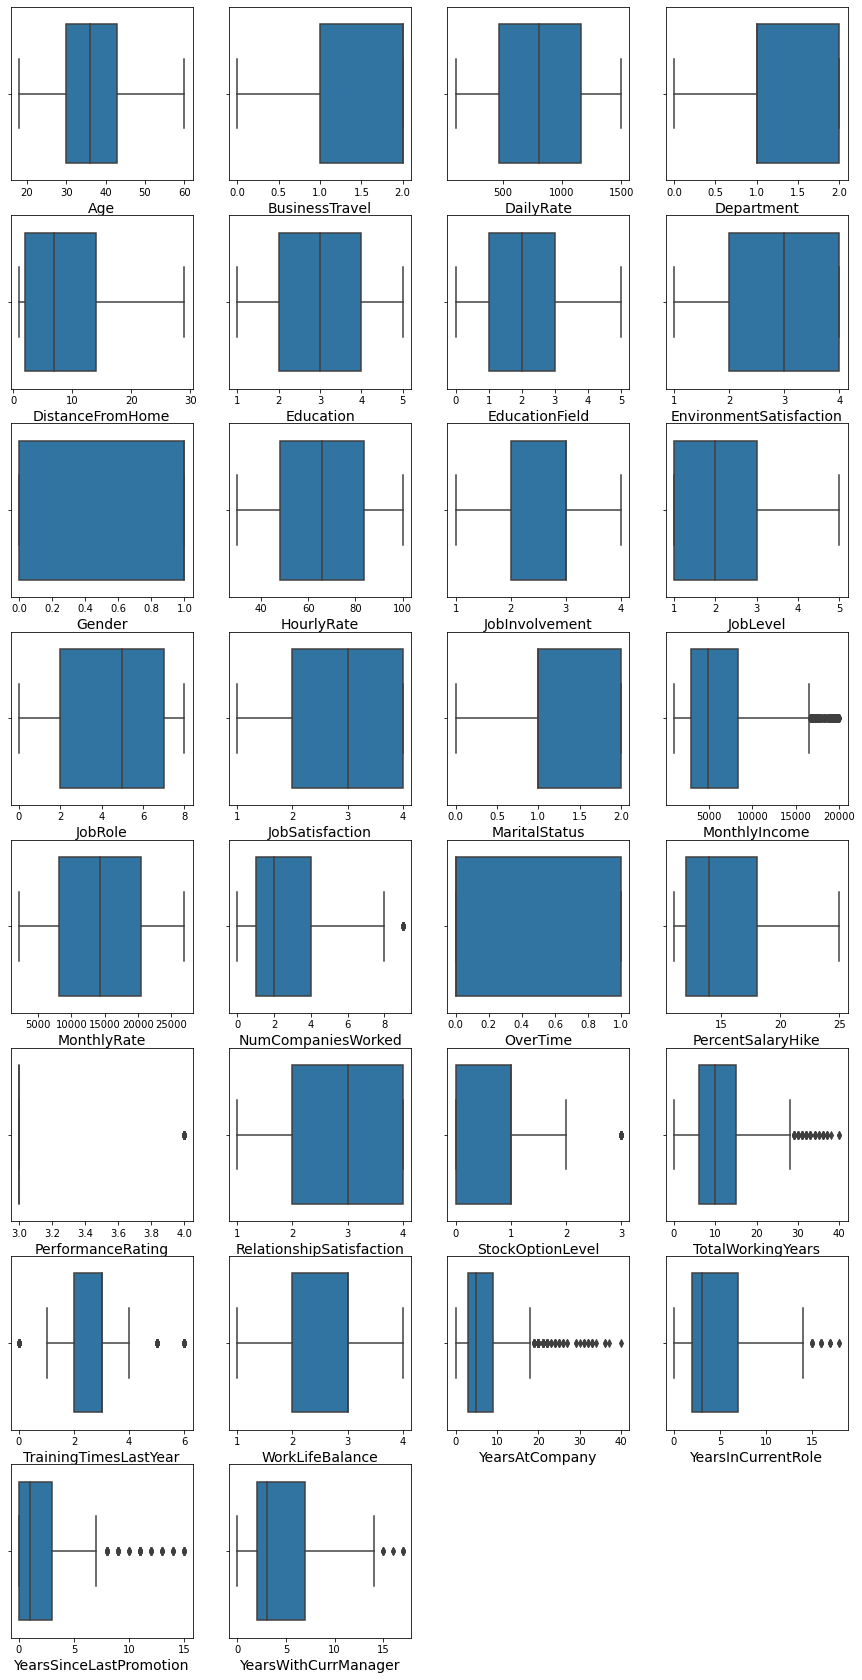

In [10]:
X=df.drop('Attrition',axis=1)
y=df.Attrition

#plotting outliers using boxplot
plt.figure(figsize=(15,30),facecolor='white')
plotnumber=1
for column in X:
    if plotnumber<=31:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(X[column],orient='V')
        plt.xlabel(column,fontsize=14)
    plotnumber+=1  
plt.show()

MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager 
have outliers we will remove them using Z score.

In [11]:
from scipy.stats import zscore #taking into consideration 99.7% data
z = np.abs(zscore(df))
df_new = df[(z<3).all(axis = 1)]
df_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


### Feature selection using Select k best

In [24]:
from sklearn.feature_selection import SelectKBest,f_classif
#f_classif uses anova for feature selection

X=df_new.drop('Attrition',axis=1)
y=df_new.Attrition

best_fet=SelectKBest(score_func=f_classif,k=18)
fit=best_fet.fit(X,y)
score=pd.DataFrame(fit.scores_)
columns=pd.DataFrame(X.columns)
feature_score=pd.concat([score,columns],axis=1)
feature_score.columns=['score','feature']
print(feature_score.nlargest(18,'score'))

        score                  feature
18  98.140453                 OverTime
23  49.422063        TotalWorkingYears
11  42.206842                 JobLevel
27  41.726267       YearsInCurrentRole
26  39.467993           YearsAtCompany
29  37.468266     YearsWithCurrManager
15  37.255699            MonthlyIncome
14  36.836958            MaritalStatus
0   36.092149                      Age
22  26.364601         StockOptionLevel
10  25.307350           JobInvolvement
13  18.303387          JobSatisfaction
7   17.719366  EnvironmentSatisfaction
4    9.327110         DistanceFromHome
12   5.747073                  JobRole
3    5.631654               Department
25   5.429960          WorkLifeBalance
24   4.559904    TrainingTimesLastYear


In [25]:
X_new=df_new[['OverTime','TotalWorkingYears','JobLevel','MaritalStatus','YearsInCurrentRole','MonthlyIncome','Age','YearsWithCurrManager',
          'StockOptionLevel','YearsAtCompany','JobInvolvement','JobSatisfaction','EnvironmentSatisfaction','DistanceFromHome','JobRole',
          'Department','WorkLifeBalance','TrainingTimesLastYear']]

### Checking for skewness

In [26]:
X_new.skew()
#threshold=+_.55
#'OverTime', 'TotalWorkingYears', 'JobLevel','YearsInCurrentRole', 'MonthlyIncome','YearsWithCurrManager',
#'StockOptionLevel', 'YearsAtCompany','DistanceFromHome','TrainingTimesLastYear' have skewness.

#.Overtime,JobLevel,StockOptionLevel,TrainingTimesLastYear have categorical values.

OverTime                   0.954751
TotalWorkingYears          1.034487
JobLevel                   1.126075
MaritalStatus             -0.160952
YearsInCurrentRole         0.726675
MonthlyIncome              1.544770
Age                        0.472280
YearsWithCurrManager       0.694506
StockOptionLevel           0.962332
YearsAtCompany             1.248623
JobInvolvement            -0.501401
JobSatisfaction           -0.345612
EnvironmentSatisfaction   -0.325285
DistanceFromHome           0.954752
JobRole                   -0.386843
Department                 0.183919
WorkLifeBalance           -0.557100
TrainingTimesLastYear      0.577614
dtype: float64

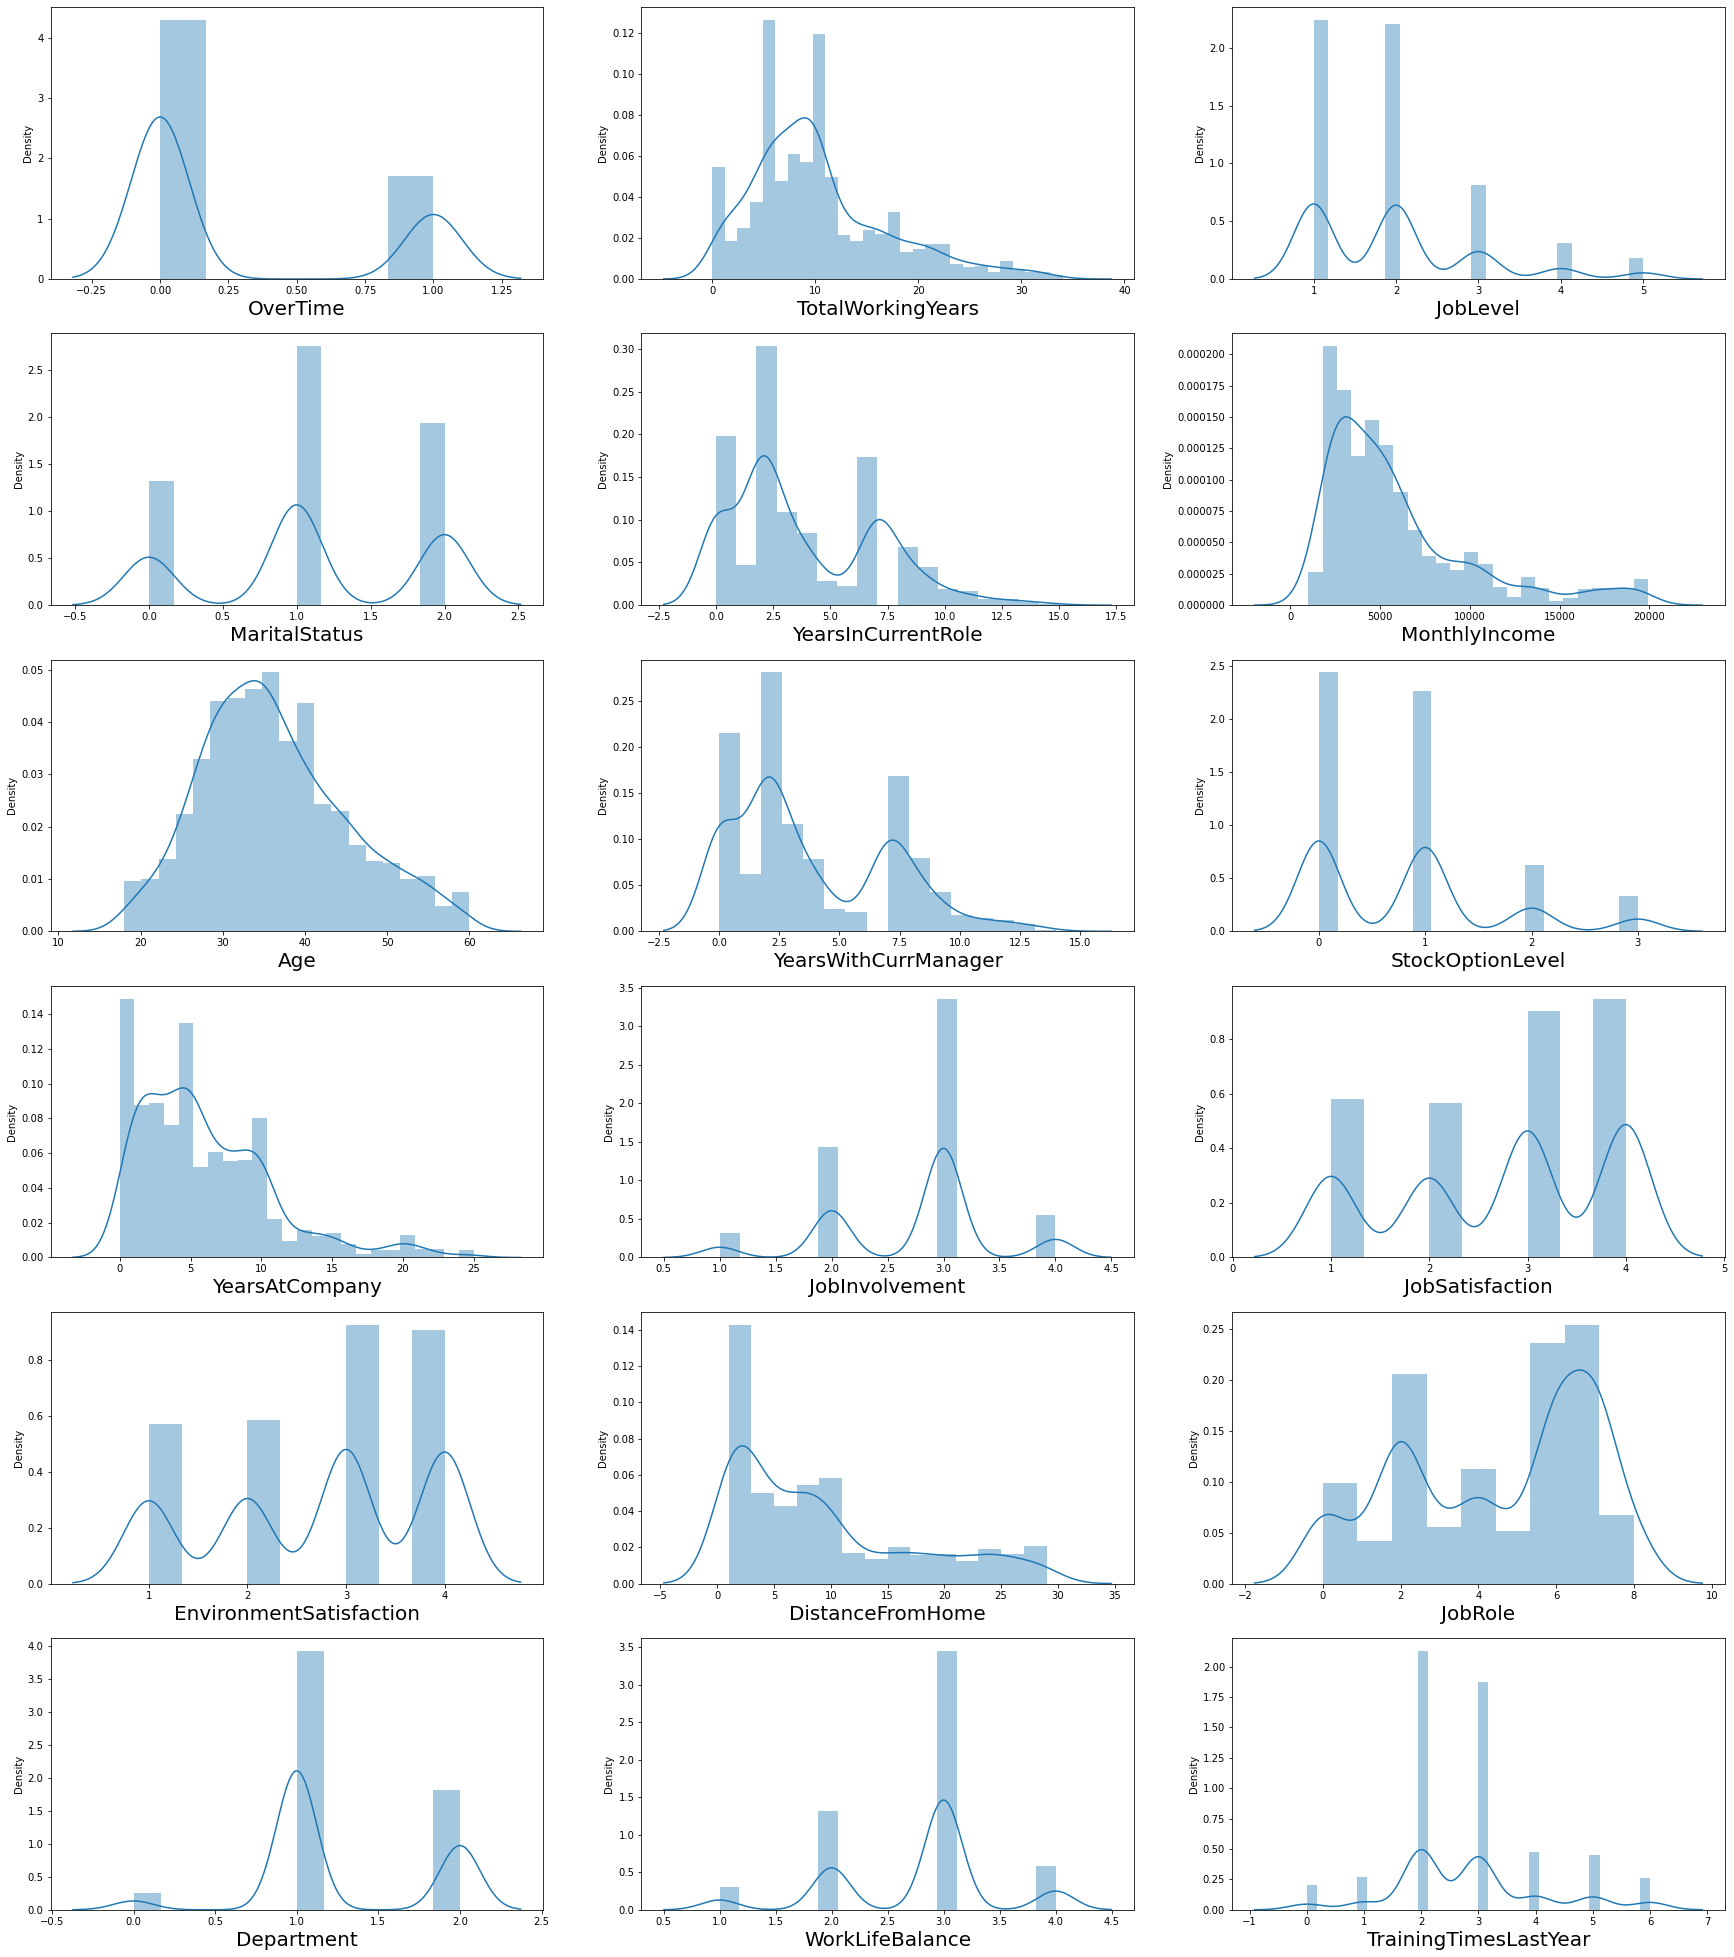

In [27]:
#checking data distribution to clear out which selected column has categorical data and which has continuous data
plt.figure(figsize=(30,35),facecolor='white')#checking data distribution wheather its normal (bell shape )
plotnumber=1
for column in X_new:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(X_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1  
plt.show()

In [28]:
#Removing skewness using yeo-johnson method



from sklearn.preprocessing import power_transform
X_skew=power_transform(X_new,method='yeo-johnson')


In [29]:
#Let's Normalise data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X_skew)

### checking target column is balanced or not

In [30]:
df.Attrition.value_counts()#checking target column is balanced or not
#1=yes,0=no
#dataset is imbalaced and it's small dataset let's use oversampling

0    1233
1     237
Name: Attrition, dtype: int64

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.30,random_state=343)

In [33]:
from collections import Counter
from imblearn.over_sampling import SMOTE


sm=SMOTE(.75)
X_train_ov,y_train_ov=sm.fit_resample(X_train,y_train)
print('Previous points',Counter(y_train))
print('New points',Counter(y_train_ov))

Previous points Counter({0: 806, 1: 164})
New points Counter({0: 806, 1: 604})


### Logistic_Regression_with_oversampled_data

In [34]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train_ov,y_train_ov)
y_pred=log_reg.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.8201438848920863

In [35]:
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))

[[290  62]
 [ 13  52]] 

              precision    recall  f1-score   support

           0       0.96      0.82      0.89       352
           1       0.46      0.80      0.58        65

    accuracy                           0.82       417
   macro avg       0.71      0.81      0.73       417
weighted avg       0.88      0.82      0.84       417



### Logistic_regression_without_oversampled_data

In [36]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=log_reg.predict(X_train)
print('Training score:',log_reg.score(X_train,y_train))
print('Testing score:',log_reg.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(log_reg,X_scaled,y,cv=5)
print('Cross_validation_score:',cvs.mean())

0.8729016786570744
[[339  13]
 [ 40  25]] 

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       352
           1       0.66      0.38      0.49        65

    accuracy                           0.87       417
   macro avg       0.78      0.67      0.71       417
weighted avg       0.86      0.87      0.86       417

Training score: 0.8618556701030928
Testing score: 0.8729016786570744
Cross_validation_score: 0.8666259771965821


### Model isperforming better without oversampling,we will use original data for other models.

### Random forest classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [38]:

rf.fit(X_train,y_train)
train_pred=rf.predict(X_train)
y_pred=rf.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=rf.predict(X_train)
print('Training score:',rf.score(X_train,y_train))
print('Testing score:',rf.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rf,X_scaled,y,cv=5)
print('Cross_validation_score:',cvs.mean())


0.8729016786570744
[[343   9]
 [ 44  21]] 

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       352
           1       0.70      0.32      0.44        65

    accuracy                           0.87       417
   macro avg       0.79      0.65      0.69       417
weighted avg       0.86      0.87      0.85       417

Training score: 1.0
Testing score: 0.8729016786570744
Cross_validation_score: 0.8550788250266214


### SVC Classifier

In [39]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train, y_train)
train_pred=svc.predict(X_train)
print("svc_training_score:",svc.score(X_train,y_train))
print("svc_testing_score:",svc.score(X_test,y_test))
pred_svc = svc.predict(X_test)
print("accuracy_score :",accuracy_score(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))
print(classification_report(y_test, pred_svc))

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(svc,X_scaled,y,cv=5)
print('Cross_validation_score:',cvs.mean())

svc_training_score: 0.8917525773195877
svc_testing_score: 0.8776978417266187
accuracy_score : 0.8776978417266187
[[347   5]
 [ 46  19]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       352
           1       0.79      0.29      0.43        65

    accuracy                           0.88       417
   macro avg       0.84      0.64      0.68       417
weighted avg       0.87      0.88      0.85       417

Cross_validation_score: 0.8565332571487936


### Ada Boost Classifier

In [40]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)


print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=ada.predict(X_train)
print('Training score:',ada.score(X_train,y_train))
print('Testing score:',ada.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(ada,X_scaled,y,cv=5)
print('Cross_validation_score:',cvs.mean())


0.8729016786570744
[[337  15]
 [ 38  27]] 

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       352
           1       0.64      0.42      0.50        65

    accuracy                           0.87       417
   macro avg       0.77      0.69      0.72       417
weighted avg       0.86      0.87      0.86       417

Training score: 0.8865979381443299
Testing score: 0.8729016786570744
Cross_validation_score: 0.8651793366750644


### Ada_boost_classifier using logistic regression as a base estimator

In [41]:
from sklearn.ensemble import AdaBoostClassifier
ada1=AdaBoostClassifier(base_estimator=log_reg,learning_rate=1,)
ada1.fit(X_train,y_train)
y_pred=ada1.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)


print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=ada1.predict(X_train)
print('Training score:',ada1.score(X_train,y_train))
print('Testing score:',ada1.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(ada1,X_scaled,y,cv=5)
print('Cross_validation_score:',cvs.mean())

0.86810551558753
[[342  10]
 [ 45  20]] 

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       352
           1       0.67      0.31      0.42        65

    accuracy                           0.87       417
   macro avg       0.78      0.64      0.67       417
weighted avg       0.85      0.87      0.85       417

Training score: 0.8670103092783505
Testing score: 0.86810551558753
Cross_validation_score: 0.8651845310755008


### Let's plot ROC_AUC curve

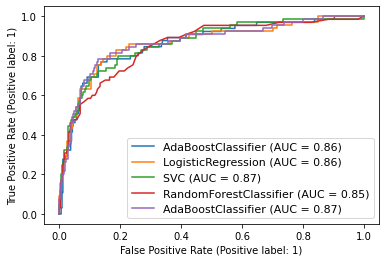

In [42]:
disp=plot_roc_curve(ada,X_test,y_test)
plot_roc_curve(log_reg,X_test,y_test,ax=disp.ax_) #ax_=Axes with confusion matrix of adaboost
plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(ada1,X_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

### Best model for the problem is AdaBoostClassifier ,let's tune parameters

In [43]:
ada1.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__C': 1.0,
 'base_estimator__class_weight': None,
 'base_estimator__dual': False,
 'base_estimator__fit_intercept': True,
 'base_estimator__intercept_scaling': 1,
 'base_estimator__l1_ratio': None,
 'base_estimator__max_iter': 100,
 'base_estimator__multi_class': 'auto',
 'base_estimator__n_jobs': None,
 'base_estimator__penalty': 'l2',
 'base_estimator__random_state': None,
 'base_estimator__solver': 'lbfgs',
 'base_estimator__tol': 0.0001,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'base_estimator': LogisticRegression(),
 'learning_rate': 1,
 'n_estimators': 50,
 'random_state': None}

In [44]:
params={'n_estimators':[5,10,15,20,25],'learning_rate':[.30,.40,.50,0.60,.70]}
from sklearn.model_selection import RandomizedSearchCV
rdm_search=RandomizedSearchCV(ada1,cv=5,param_distributions=params)
rdm_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(base_estimator=LogisticRegression(),
                                                learning_rate=1),
                   param_distributions={'learning_rate': [0.3, 0.4, 0.5, 0.6,
                                                          0.7],
                                        'n_estimators': [5, 10, 15, 20, 25]})

In [45]:
rdm_search.best_params_

{'n_estimators': 25, 'learning_rate': 0.4}

In [46]:
ada=AdaBoostClassifier(base_estimator=log_reg, n_estimators=25,learning_rate=.4)

In [47]:
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)


In [48]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
acc

0.8705035971223022

In [ ]:
#saving the model in local system
import pickle
filename='finalized_HR_attrition.pickle'
pickle.dump(ada,open(filename,'wb'))

### END